#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
await piplite.install(['seaborn'])
from scipy import stats

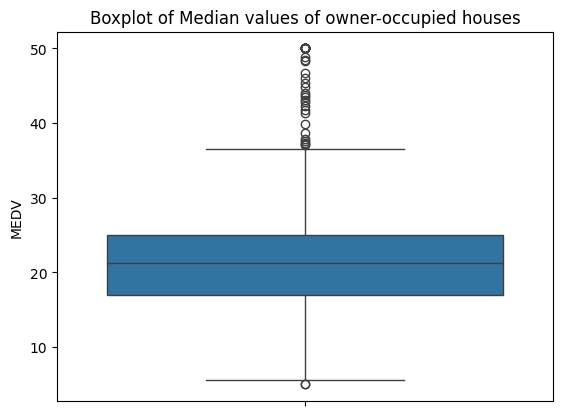

<class 'AttributeError'>: 'list' object has no attribute 'show'

In [48]:
# Use a boxplot of median values of owner-occupied houses.
bxplt = sns.boxplot(y="MEDV",
                 data=boston_df).set(title='Boxplot of Median values of owner-occupied houses')
bxplt.show()

*Boxplot of median values of owner-occupied houses.*

Visualize homes that are/are not bordered by the Charles River.

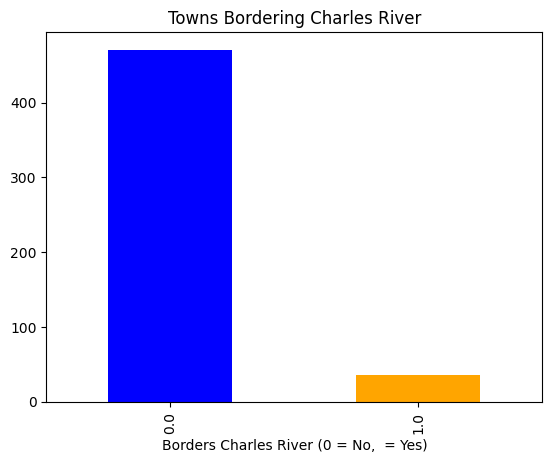

<class 'NameError'>: name 'plt' is not defined

In [27]:
# Count the occurrences of each value in the Charles River variable
charles_river_counts = boston_df['CHAS'].value_counts()
charles_river_counts.plot(kind='bar', color=['blue', 'orange'],
                         title='Towns Bordering Charles River', xlabel='Borders Charles River (0 = No,  = Yes)')
plt.show()


*Bar plot for the Charles river variable.*

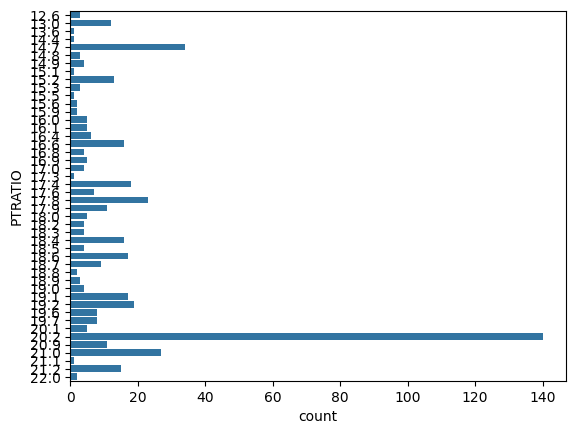

<class 'NameError'>: name 'plt' is not defined

In [32]:
#histogram pupil-teacher ratio by town using seaborn
sns.countplot(y='PTRATIO', data=boston_df)
plt.show


*Histogram of pupil-teacher ratio by town.*

### Is there a significant difference in median value of houses bounded by the Charles river?

Conduct levene test for significance in order to use a t-test to determine
whether houses bounded by the Charles River have a significanct difference in median values of owner-occupied homes. 


<ipython-input-63-de496abebdf1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(boston_df['MEDV'],


[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Normal Distribution of Median Value of Houses Histogram')]

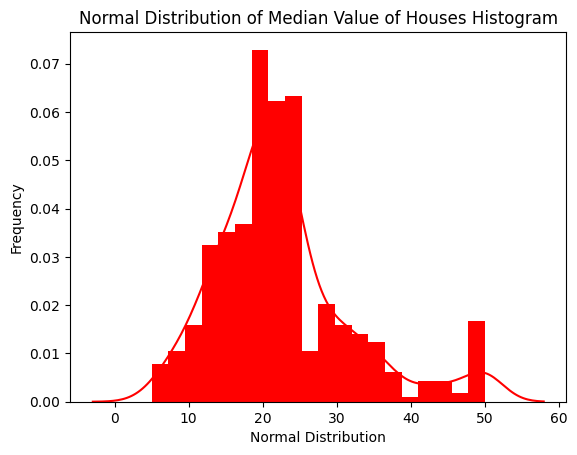

In [63]:
# Create a histogram to visualize distribution of the 'MEDV' variable - median value of owner-occupied homes.
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency', title='Normal Distribution of Median Value of Houses Histogram')

*Histogram of distribution of the 'MEDV' variable.*

State the Hypothesis:
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values of houses bounded by the Charles River")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median values of houses bounded by the Charles River")


(α = 0.05)

In [35]:
bound = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Houses bounded by Charles River
unbound = boston_df[boston_df['CHAS'] == 0] ['MEDV'] #Houses unbounded
stats.levene(bound, unbound) # Assigning levene test to a variable


LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [26]:
stats.ttest_ind(bound, unbound, equal_var=(levene.pvalue > 0.05))

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:**  The null hypothesis must be rejected as the p-value < 0.05. There is a significant diference in median values of houses bounded by the Charles River. 

### Is there a difference in Median values of houses for each proportion of owner occupied units built prior to 1940?
Discretize units built prior to 1940 into 3 different categories and portray boxplot. 

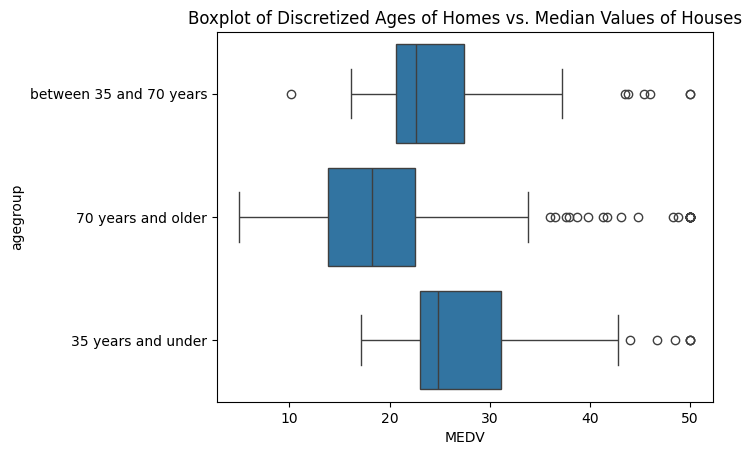

<class 'NameError'>: name 'plt' is not defined

In [56]:
boston_df.loc[(boston_df['AGE'] <=35), 'agegroup'] = '35 years and under'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'agegroup'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'agegroup'] = '70 years and older'

#Box plot of age categories vs. median values 
bxplt = sns.boxplot(x="MEDV", y="agegroup",
                 data=boston_df).set_title("Boxplot of Discretized Ages of Homes vs. Median Values of Houses")
plt.show()

*Boxplot of Discretized Ages of Homes vs. Median Values of Houses*

State the Hypothesis:
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median values of houses for each proportion of owner occupied units before 1940")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median values of houses for each proportion of owner occupied units before 1940")


(α = 0.05)

In [28]:
thirtyfive_lower = boston_df[boston_df['agegroup'] == '35 years and under']['MEDV']
btwnthirtyfive_seventy = boston_df[boston_df['agegroup'] == 'between 35 and 70 years']['MEDV']
seventy_up= boston_df[boston_df['agegroup'] == '70 years and older']['MEDV']

scipy.stats.f_oneway(thirtyfive_lower, btwnthirtyfive_seventy, seventy_up)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

**Conclusion:** We reject the null hypothesis as the p-value < 0.05. There is a difference in median values of houses for each proportion of owner occupied units before 1940.

### Can we conclude that there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town? 
Use a scatter plot to visualize the two continuous variables.

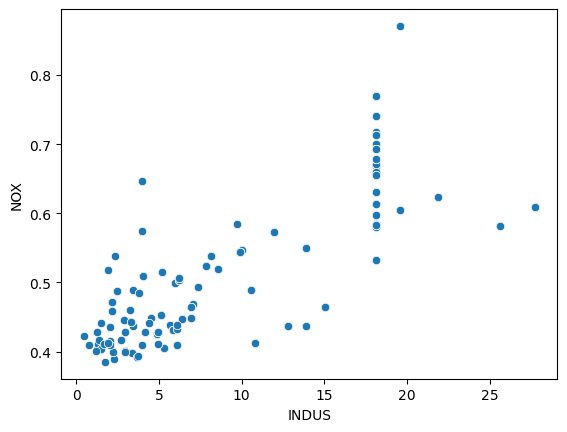

<class 'AttributeError'>: 'AxesSubplot' object has no attribute 'subtitle'

In [61]:
# 'NOX' =  Nitric Oxide concentration, 'INDUS' = proportion of non-retail business acres per town
ax = sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

*Scatter plot to visualize the Nitric Oxide concentration by proportion on non-retail businesses/town.*

*   $H\_0:$ There is not a relationship between Nitric Oxide concentrations and propotion of non-retail business acres per town
*   $H\_1:$ There is a relationship between Nitric Oxide concentrations and propotion of non-retail business acres per town

Use the Pearson Correlation method to test the relationship between the two variables:

In [30]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Conclusion:** The Pearson Correlation coefficient is 0.7636 and falls closer to 1 which indicates an upward (positive) sloping curve and a p-value < 0.05, which means we must reject the null hypothesis. There is an association between the Nitric oxide concentrations and the proportion of non-retail business acres per town. 

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)



*   $H\_0: β1$ = 0 There is no impact from distance to the five Boston on median values of homes
*   $H\_1: β1$ is not equal to 0 (There is an impact from distance to the employment centres on the median values of homes)

In [31]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        15:14:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** The p-value < (α) level = 0.05, so we reject the null hypothesis, as there is evidence that there is an impact on median values of houses according to their distance to employment centers. The coefficient (1.0916) articulates that additional weighted distance to the five Boston employment centers the median value of homes increased the values by $1,091.6.

(c) Anais Morales